In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import bomscrape
import numscrape
import math
from collections import Counter
%matplotlib inline

In [2]:
def to_float(array):
    arr = np.empty(len(array))
    
    ratings = ['G','PG','PG-13','R','NC-17','Unrated']
    values = np.arange(float(6))    
    for rt in range(len(array)):
        rating = array[rt]
        index = ratings.index(rating) 
        arr[rt] = values[index]
        
    return arr

In [3]:
# Plot freq dist. of ratings for a year
def plot_hist_rats(data, year):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    plt.hist(rating_float, bins=50)

    plt.xlabel('MPAA Rating')
    plt.ylabel('Count')
    plt.title('Movies made in '+str(year))
    plt.xticks([0,1,2,3,4,5], labels)

    plt.show()

In [4]:
# Plot ratings versus DTG for a year
def plot_2vars_rats(data, year):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    sns.set_style('whitegrid')

    plt.scatter(rating_float, data['TotalGross'].values)

    plt.xlabel('MPAA Rating')
    plt.ylabel('Domestic Total Gross in millions')
    plt.title(str(year)+' movie gross by rating')
    plt.xticks([0,1,2,3,4,5], labels)
    plt.show()

In [5]:
# Plot linear model for a year
def plot_lm_rats(data, year):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    df = data.loc[:,'Studio':'OTheaters']
    df.drop('MPAARating', axis=1, inplace=True)
    df['Rating'] = rating_float
    sns.lmplot('Rating','TotalGross',data=df)
    plt.title(str(year)+' movie gross by rating')
    plt.xticks([0,1,2,3,4,5], labels)
    plt.show()

In [6]:
# Plot linear model without Unrated category for a year
def plot_lm_without_unrated(data, year):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    whereUnrated = np.where(data['MPAARating'].values == 'Unrated')
    firstUnrated = whereUnrated[0][0]
    df = data.loc[:firstUnrated-1,'Studio':'OTheaters']
    df.drop('MPAARating', axis=1, inplace=True)
    df['Rating'] = rating_float[:firstUnrated]
    
    sns.lmplot('Rating','TotalGross',data=df)
    plt.title(str(year)+' movie gross by rating')
    plt.xticks([0,1,2,3,4], labels[:5])
    plt.show()

In [48]:
# Summary linear model without Unrated category for a year
def summary_lm_unrated(data):
    rating_float = to_float(data['MPAARating'].values)
    labels = ['G','PG','PG-13','R','NC-17','Unrated']
    whereUnrated = np.where(data['MPAARating'].values == 'Unrated')
    firstUnrated = whereUnrated[0][0]
    df = data.loc[:firstUnrated-1,'Studio':'OTheaters']
    df.drop('MPAARating', axis=1, inplace=True)
    df['Rating'] = rating_float[:firstUnrated]
    
    y, X = dmatrices('TotalGross ~ OTheaters', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Rating', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Studio + TGTheaters+ Opening + OTheaters + Rating', data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    results = model.fit()
    return results.summary()

In [103]:
# Plot freq dist of years for a rating
def plot_hist_years(data, rating):
    years = data['Year'].values
    labels = np.unique(years)
    
    plt.hist(years, bins=50)

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Movies rated as '+str(rating))
    plt.xticks(labels, labels, rotation = 45)

    plt.show()

In [ ]:
# Plot year versus DTG for a rating
def plot_2vars_years(data, rating):
    years = data['Year'].values
    labels = np.unique(years)
    
    sns.set_style('whitegrid')
    plt.scatter(years, data['TotalGross'].values)

    plt.xlabel('Year')
    plt.ylabel('Domestic Total Gross in millions')
    plt.title('Domestic total gross by year for movies rated as '+str(rating))
    plt.xticks(labels, labels)
    plt.show()
    
    

In [90]:
# Plot linear model for a rating
def plot_lm_years(data, rating):
    years = data['Year'].values
    labels = np.unique(years)
    
    df = data.loc[:,'Year':'OTheaters']
    df.drop('MPAARating', axis=1, inplace=True)
    df.drop('Movie Title ', axis=1, inplace=True)
    sns.lmplot('OTheaters','TotalGross',data=df)
    plt.title('Domestic total gross of '+str(rating)+'-rated movies by year')
    plt.xticks(labels, labels)
    plt.show()
    
    

In [94]:
# Summary linear model for a rating
def summary_lm_years(data):
    years = data['Year'].values
    totals = Counter(years).values()
    labels = np.unique(years)
#     logs = [math.log(x) for x in years]

    df = data.loc[:,'Year':'OTheaters']
    df.drop('MPAARating', axis=1, inplace=True)
    df.drop('Movie Title ', axis=1, inplace=True)
#     df['YearLogs'] = logs
    y, X = dmatrices('OTheaters ~ TotalGross', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Rating', data=df, return_type='dataframe')
#     y, X = dmatrices('TotalGross ~ Studio + TGTheaters+ Opening + OTheaters + Rating', data=df, return_type='dataframe')
    model = sm.OLS(y, X)
    results = model.fit()
    return results.summary()

In [26]:
data2012 = bomscrape.by_year(2012)

In [97]:
dataNC17 = bomscrape.by_rating('NC-17', 1994, 2013)

In [70]:
dataUnrated = bomscrape.by_rating('Unrated', 1990, 2000)

Unresponsive. Trying Again...


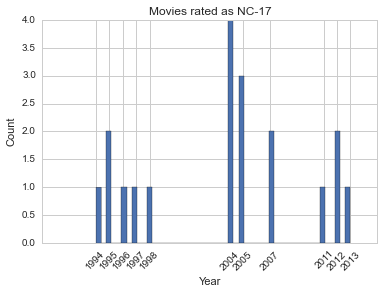

In [104]:
plot_hist_years(dataNC17, 'NC-17')

In [105]:
dataPG13 = bomscrape.by_rating('PG-13', 1994, 2013)

Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...


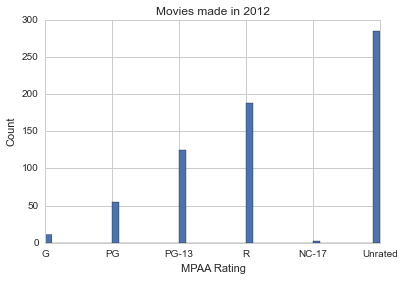

In [107]:
plot_hist_rats(data2012, 2012)

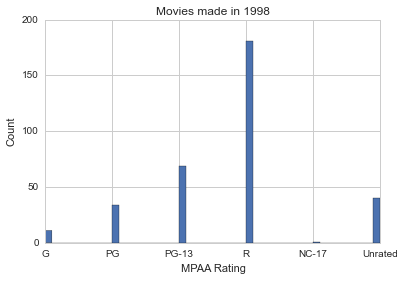

In [109]:
data1998 = bomscrape.by_year(1998)
plot_hist_rats(data1998, 1998)

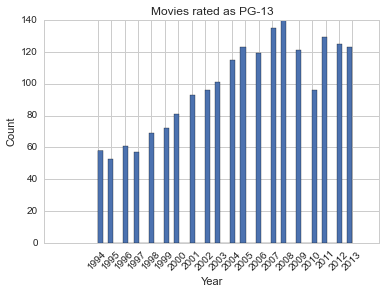

In [110]:
plot_hist_years(dataPG13, 'PG-13')

Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...
Unresponsive. Trying Again...


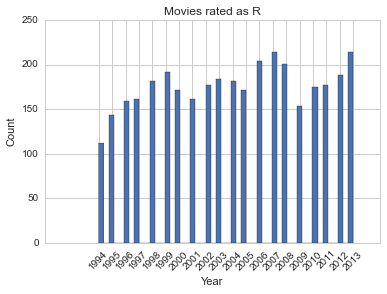

In [111]:
dataR = bomscrape.by_rating('R', 1994, 2013)
plot_hist_years(dataR, 'R')